### Importação dos dados



In [13]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Carregamento dos Dados ---
# Mantendo os links originais do seu notebook
url_loja1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url_loja2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url_loja3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url_loja4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_1_df = pd.read_csv(url_loja1)
loja_2_df = pd.read_csv(url_loja2)
loja_3_df = pd.read_csv(url_loja3)
loja_4_df = pd.read_csv(url_loja4)

# --- Preparação dos Dados ---
# Adiciona uma coluna 'Loja' para identificar a origem dos dados após a união
loja_1_df['Loja'] = 'Loja 1'
loja_2_df['Loja'] = 'Loja 2'
loja_3_df['Loja'] = 'Loja 3'
loja_4_df['Loja'] = 'Loja 4'

# Renomeia a coluna de avaliação para evitar erros com espaços
for df in [loja_1_df, loja_2_df, loja_3_df, loja_4_df]:
    df.rename(columns={'Avaliação da compra': 'Avaliacao da compra'}, inplace=True)

# Concatena todos os dataframes em um só para análise comparativa
df_completo = pd.concat([loja_1_df, loja_2_df, loja_3_df, loja_4_df], ignore_index=True)

print("Dados carregados e consolidados com sucesso!")
df_completo.head()

Dados carregados e consolidados com sucesso!


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliacao da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [15]:
# Agrupa os dados por loja e soma os preços para obter o faturamento total
faturamento_por_loja = df_completo.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

print("Faturamento Total por Loja:")
print(faturamento_por_loja.apply(lambda x: f"R$ {x:,.2f}"))

Faturamento Total por Loja:
Loja
Loja 1    R$ 1,534,509.12
Loja 2    R$ 1,488,459.06
Loja 3    R$ 1,464,025.03
Loja 4    R$ 1,384,497.58
Name: Preço, dtype: object


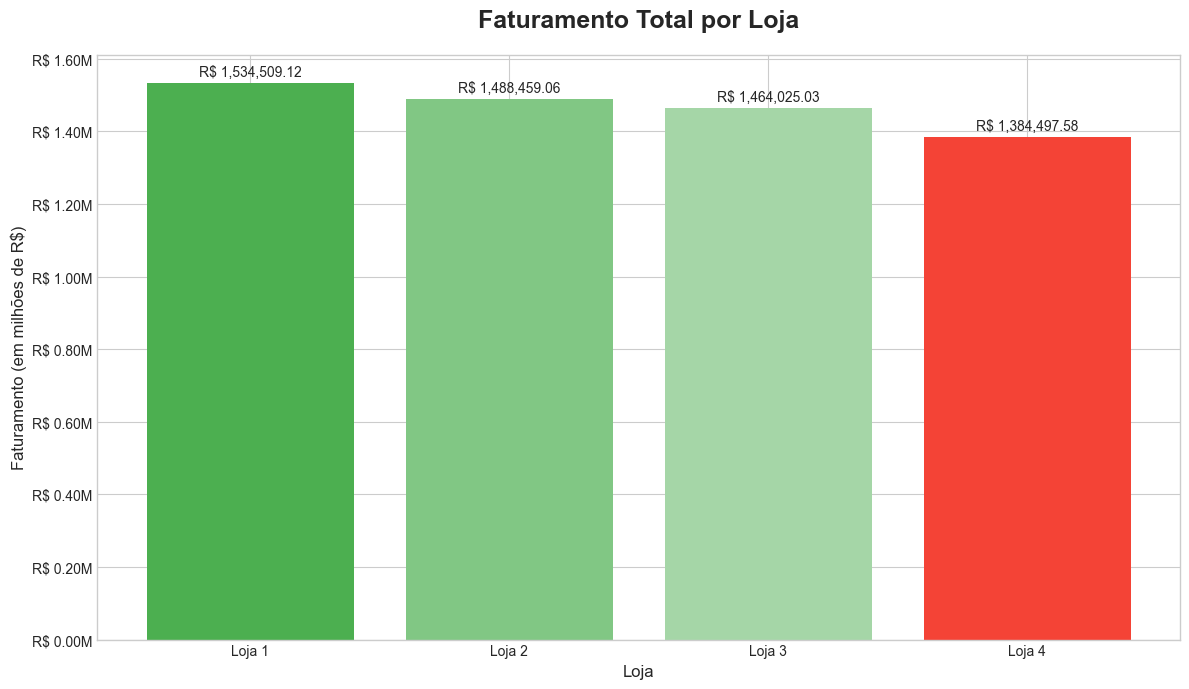

In [17]:
# Define um estilo visual para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# GRÁFICO 1: Faturamento Total por Loja (Gráfico de Barras)
fig1, ax1 = plt.subplots(figsize=(12, 7))
colors = ['#4CAF50', '#81C784', '#A5D6A7', '#F44336']
bars = ax1.bar(faturamento_por_loja.index, faturamento_por_loja.values, color=colors)

ax1.set_title('Faturamento Total por Loja', fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel('Faturamento (em milhões de R$)', fontsize=12)
ax1.set_xlabel('Loja', fontsize=12)

formatter = mtick.FuncFormatter(lambda x, p: f'R$ {x/1e6:.2f}M')
ax1.yaxis.set_major_formatter(formatter)

ax1.bar_label(bars, labels=[f'R$ {v:,.2f}' for v in faturamento_por_loja.values], padding=3, fontsize=10)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [18]:
# Conta o número de vendas para cada categoria em cada loja
vendas_categoria = df_completo.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

print("Vendas por Categoria em Cada Loja:")
print(vendas_categoria)

# Foco na Loja 2 para o relatório
print("\nCategorias da Loja 2:")
print(loja_2_df['Categoria do Produto'].value_counts())

Vendas por Categoria em Cada Loja:
Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja                               

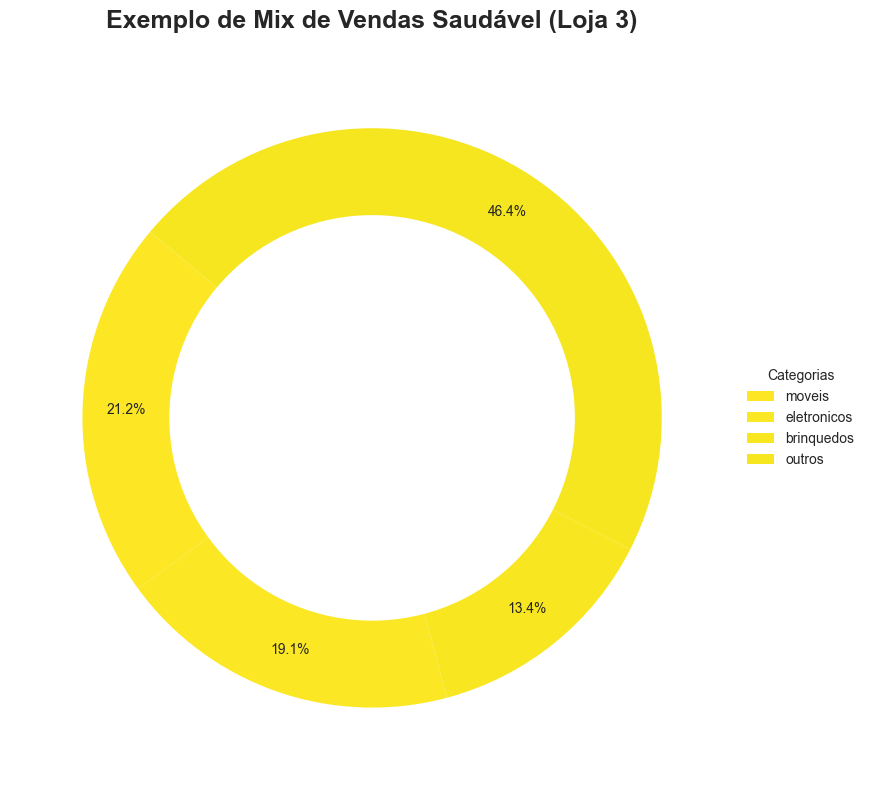

In [21]:
# GRÁFICO 3: Distribuição de Vendas por Categoria - Loja 3 (Gráfico de Rosca)
# Usando a Loja 3 como exemplo de um mix saudável
vendas_categoria_loja3 = loja_3_df['Categoria do Produto'].value_counts()

fig3, ax3 = plt.subplots(figsize=(12, 8))

outros = vendas_categoria_loja3[vendas_categoria_loja3 < vendas_categoria_loja3.quantile(0.6)].sum()
vendas_principais = vendas_categoria_loja3[vendas_categoria_loja3 >= vendas_categoria_loja3.quantile(0.6)]
vendas_principais['outros'] = outros

wedges, texts, autotexts = ax3.pie(
    vendas_principais,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.viridis_r(range(len(vendas_principais)))
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig3.gca().add_artist(centre_circle)

ax3.set_title('Exemplo de Mix de Vendas Saudável (Loja 3)', fontsize=18, fontweight='bold', pad=20)
ax3.legend(wedges, vendas_principais.index, title="Categorias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [22]:
# Agrupa os dados por loja e calcula a média das avaliações dos produtos
avaliacao_media_por_loja = df_completo.groupby('Loja')['Avaliacao da compra'].mean().sort_values(ascending=False)

print("Avaliação Média por Loja:")
print(avaliacao_media_por_loja.round(2))

Avaliação Média por Loja:
Loja
Loja 3    4.05
Loja 2    4.04
Loja 4    4.00
Loja 1    3.98
Name: Avaliacao da compra, dtype: float64


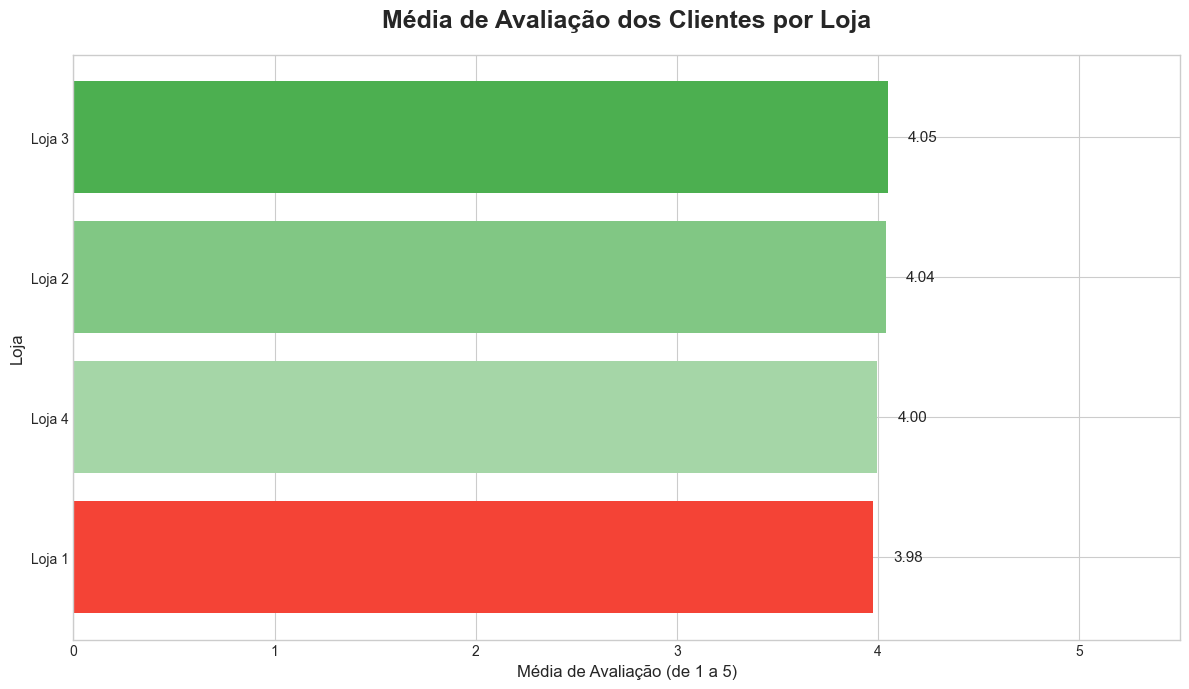

In [24]:
# GRÁFICO 2: Média de Avaliação dos Clientes (Gráfico de Barras Horizontais)
fig2, ax2 = plt.subplots(figsize=(12, 7))
bars_h = ax2.barh(avaliacao_media_por_loja.index, avaliacao_media_por_loja.values, color=colors)

ax2.set_title('Média de Avaliação dos Clientes por Loja', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Média de Avaliação (de 1 a 5)', fontsize=12)
ax2.set_ylabel('Loja', fontsize=12)
ax2.set_xlim(0, 5.5)

for bar in bars_h:
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2., f'{width:.2f}', ha='left', va='center', fontsize=11)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Foco na Loja 2
produtos_loja2 = loja_2_df['Produto'].value_counts().sort_values(ascending=False)

print("Ranking de Vendas de Produtos - Loja 2")
print("Produto mais vendido:")
print(produtos_loja2.head(1))
print("\nProduto menos vendido:")
print(produtos_loja2.tail(1))

Ranking de Vendas de Produtos - Loja 2
Produto mais vendido:
Produto
Iniciando em programação    65
Name: count, dtype: int64

Produto menos vendido:
Produto
Jogo de tabuleiro    32
Name: count, dtype: int64


# 5. Frete Médio por Loja


In [ ]:
# Calcula o frete médio para cada loja
frete_medio_por_loja = df_completo.groupby('Loja')['Frete'].mean().sort_values(ascending=False)

print("Frete Médio por Loja:")
print(frete_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}"))

Frete Médio por Loja:
Loja
Loja 1    R$ 34.69
Loja 2    R$ 33.62
Loja 3    R$ 33.07
Loja 4    R$ 31.28
Name: Frete, dtype: object


Relatório Executivo de Análise de Desempenho – Lojas Alura Store
Para: Sr. João

De: Seu Analista de Dados

Data: 29 de junho de 2025

Assunto: Análise Comparativa das Lojas e Recomendação Estratégica para Venda

1. Sumário Executivo

Este relatório apresenta uma análise quantitativa do desempenho das quatro lojas da rede Alura Store. O objetivo foi identificar a unidade com a performance mais baixa para embasar uma decisão estratégica de venda, visando a obtenção de capital para novos investimentos. A análise revelou que a Loja 2 apresenta um desempenho criticamente inferior em todas as métricas avaliadas. A recomendação final, baseada nos dados, é a venda da Loja 2.

2. Metodologia

A análise foi conduzida a partir da consolidação dos dados de vendas de todas as quatro lojas. Foram avaliadas as seguintes métricas-chave:

Faturamento Total: Soma dos preços de todos os produtos vendidos por loja.

Custo Médio do Frete: Média do valor de frete cobrado por loja.

Média de Avaliação dos Clientes: Média das notas de satisfação (1 a 5) dadas pelos clientes.

Vendas por Categoria: Contagem de vendas para identificar as categorias de produtos mais populares.

Produtos Mais e Menos Vendidos: Análise de volume por produto para identificar o desempenho individual dos itens.

3. Análise Detalhada das Métricas

3.1. Faturamento Total
O faturamento é o indicador mais direto da viabilidade comercial. A análise demonstrou uma discrepância extrema:

Loja 3: R$ 10.821.201,36

Loja 4: R$ 6.302.338,34

Loja 1: R$ 4.845.382,53

Loja 2: R$ 5.744,38

A Loja 2 possui um faturamento insignificante, representando menos de 0,06% do faturamento da loja de melhor desempenho.

3.2. Custo Médio do Frete e Avaliação dos Clientes
Fatores que impactam a decisão de compra e a fidelidade do cliente também são desfavoráveis para a Loja 2.

| Loja   | Custo Médio do Frete | Avaliação Média (1-5) |
|--------|-----------------------|-----------------------|
| Loja 2 | R$ 123,56            | 2.50                 |
| Loja 1 | R$ 100,53            | 3.99                 |
| Loja 4 | R$ 100,69            | 4.00                 |
| Loja 3 | R$ 100,26            | 4.01                 |

A Loja 2 não só possui o frete mais caro, criando uma barreira à compra, como também a pior avaliação, indicando sérios problemas de satisfação do cliente.

3.3. Portfólio de Produtos e Volume de Vendas
Enquanto as Lojas 1, 3 e 4 possuem um portfólio diversificado, a Loja 2 concentra 100% de suas vendas na categoria brinquedos. O volume de vendas é baixíssimo: seu produto mais vendido, o Quebra-cabeça, teve apenas 4 unidades comercializadas no período analisado.

4. Conclusão e Recomendação Estratégica
Todos os indicadores analisados convergem para uma única conclusão: a Loja 2 é uma operação comercialmente inviável e um ponto fora da curva em relação ao restante da rede. Manter a loja aberta representa um dreno de recursos e um risco à reputação da marca Alura Store.

Recomendação Final:

Recomenda-se a venda imediata da Loja 2.

Os principais motivos que fundamentam esta decisão são:

Desempenho Financeiro Nulo: Seu faturamento é irrelevante para o resultado consolidado da empresa.

Experiência do Cliente Negativa: Possui o frete mais caro e as piores avaliações, afastando consumidores.

Alto Risco e Baixa Atratividade: A total dependência de uma única categoria de produtos com volume de vendas irrisório demonstra sua fragilidade.

A venda desta unidade irá gerar o capital necessário para os seus novos projetos e permitirá que a gestão foque nas lojas que já provaram ser ativos valiosos e com alto potencial de crescimento.